In [16]:
#Create .npy file
from scipy.io import wavfile
import numpy as np

# read wav file
fs, data = wavfile.read('new_light.wav')

# save npy file
np.save('new_light.npy', data)

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the encoder network
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, latent_dim)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the decoder network
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the full VAE model
class VAE(nn.Module):
    def __init__(self, encoder, decoder):
        super(VAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load the musical data
data = np.load('new_light.npy')

# Split the data into training and testing sets
train_data = data[:8000]
test_data = data[8000:]

# Define the model parameters
input_dim = train_data.shape[1]
hidden_dim = 128
latent_dim = 32
output_dim = input_dim

# Initialize the encoder and decoder networks
encoder = Encoder(input_dim, hidden_dim, latent_dim)
decoder = Decoder(latent_dim, hidden_dim, output_dim)

# Initialize the VAE model
model = VAE(encoder, decoder)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(1000):
    running_loss = 0.0
    for i, sample in enumerate(train_data):
        optimizer.zero_grad()
        inputs = torch.tensor(sample, dtype=torch.float32)
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 100 == 0:
        print('Complete')

Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the encoder network
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, latent_dim)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the decoder network
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the full VAE model
class VAE(nn.Module):
    def __init__(self, encoder, decoder):
        super(VAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load the musical data
data = np.load('new_light.npy')

# Split the data into training and testing sets
train_data = data[:8000]
test_data = data[8000:]

# Define the model parameters
# input_dim = train_data.shape[1]
input_dim = 44100
hidden_dim = 128
latent_dim = 32
output_dim = 44100

# Initialize the encoder and decoder networks
encoder = Encoder(input_dim, hidden_dim, latent_dim)
decoder = Decoder(latent_dim, hidden_dim, output_dim)

# Initialize the VAE model
model = VAE(encoder, decoder)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(1000):
    running_loss = 0.0
    for i, sample in enumerate(train_data):
        optimizer.zero_grad()
        inputs = torch.tensor(sample, dtype=torch.float32)
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 100 == 0:
        print(f'Complete {epoch}epoch')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2 and 44100x128)

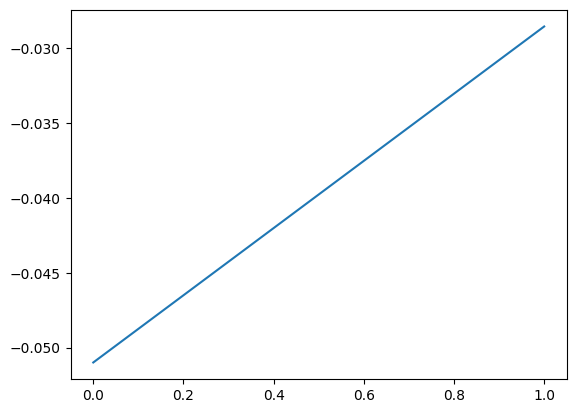

In [18]:
# Generate music using the trained VAE model
with torch.no_grad():
    # Choose a random latent code from a normal distribution
    latent_code = torch.randn(1, latent_dim)
    # Pass the latent code through the decoder network
    generated_music = decoder(latent_code)
    # Convert the generated music back to a numpy array
    generated_music = generated_music.numpy()[0]
    # Plot the generated music
    plt.plot(generated_music)
    plt.show()

In [22]:
# Convert the generated music to a wav file
import scipy.io.wavfile
scipy.io.wavfile.write("generated_music.wav", fs, generated_music)

# Play the generated music
import IPython.display as ipd
ipd.Audio("generated_music.wav")

In [23]:
import scipy.io.wavfile

fs, data = scipy.io.wavfile.read("generated_music.wav")
print("Sample rate of the file:", fs)


Sample rate of the file: 44100


In [28]:
import numpy as np

# Load the generated music as a numpy array
fs, generated_music = scipy.io.wavfile.read("generated_music.wav")

# Get the length of the generated music
length = np.shape(generated_music)[0]

print(length, fs)


2 44100
